In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.interpolate import make_interp_spline
import numpy as np



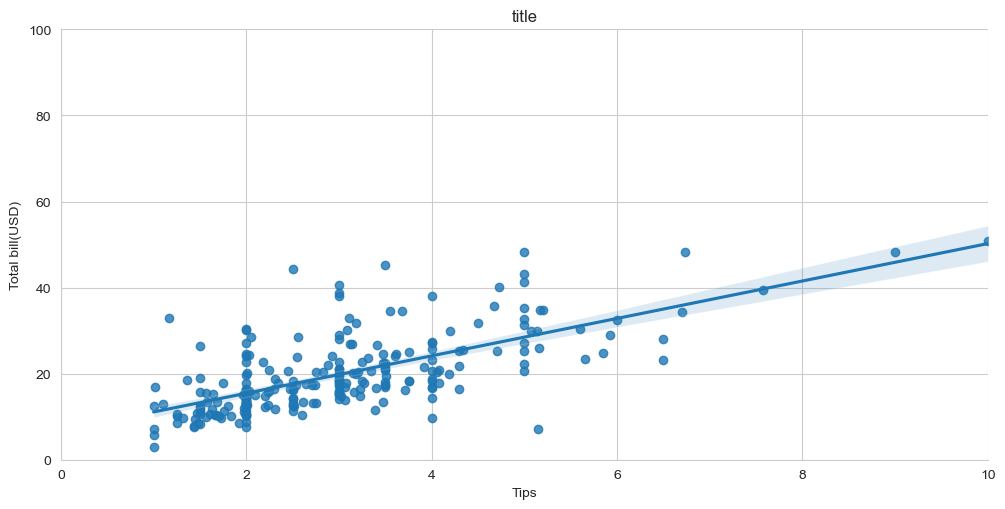

In [2]:
tips = sns.load_dataset('tips')
sns.set_style("whitegrid")
g = sns.lmplot(x = 'tip', y = 'total_bill', data = tips, aspect = 2)
g = (g.set_axis_labels('Tips', 'Total bill(USD)').set(xlim=(0,10), ylim=(0,100)))
plt.title('title')
plt.show(g)

In [3]:
df1 = pd.read_csv('../sim_logs/summary_demand100.csv')
df2 = pd.read_csv('../sim_logs/summary_demand150.csv')
df3 = pd.read_csv('../sim_logs/summary_demand50.csv')

df = pd.concat([df1,df2,df3], ignore_index=True)
print(df.shape)
df

(880, 82)


,Time,Demand_Percentage(%),Prediction_Horizon(min),CAV_Penetration(%),Eco_Routing_with_Travel_Time(0/1),Vehicle_Fleet,Overall_Travel_Time_Avg(s),Overall_Fuel_Used(gallon),Overall_Electricity_Used(kWh),Overall_Fuel_Cost($),...,Electricity_Used_HFCV_NONCAV_Avg(kWh)_After1hour,Vehicle_Count_ICE_After1hour,Vehicle_Count_ICE_NONCAV_After1hour,Vehicle_Count_BEV_After1hour,Vehicle_Count_BEV_NONCAV_After1hour,Vehicle_Count_PHEV_After1hour,Vehicle_Count_PHEV_NONCAV_After1hour,Vehicle_Count_HFCV_After1hour,Vehicle_Count_HFCV_NONCAV_After1hour,number_of_vehicles_left_in_the_network
0,2.020000e+13,100,5,0,0,2030,799.776,6028.510,12454.2,21099.80,...,1.048200,0,6029,0,962,0,944,0,87,164
1,2.020000e+13,100,5,10,0,2030,809.115,6083.520,12668.6,21292.30,...,1.174310,650,5595,75,913,89,986,9,69,217
2,2.020000e+13,100,5,20,0,2030,795.360,6076.900,12654.8,21269.10,...,1.155020,1279,5207,200,830,206,839,23,76,105
3,2.020000e+13,100,5,30,0,2030,781.032,6110.380,12632.1,21386.30,...,1.024260,1758,4234,306,725,353,673,29,65,103
4,2.020000e+13,100,5,40,0,2030,810.031,6270.690,12560.4,21947.40,...,1.092700,2508,3775,481,584,448,601,47,48,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,2.023081e+13,50,20,60,1,Average,396.013,676.921,18146.6,2369.22,...,0.876880,287,169,292,181,262,149,295,168,0
876,2.023081e+13,50,20,70,1,Average,396.288,680.614,18253.3,2382.15,...,0.738074,333,142,334,129,326,138,339,130,0
877,2.023081e+13,50,20,80,1,Average,400.490,667.606,18784.2,2336.62,...,0.889817,374,78,382,99,393,86,347,89,0
878,2.023081e+13,50,20,90,1,Average,424.845,724.432,19140.8,2535.51,...,1.005950,440,41,432,48,437,40,434,36,0


In [4]:
test_df = df[(df['Vehicle_Fleet'] == '2030') & (df['Demand_Percentage(%)'] == 100) & (df['Eco_Routing_with_Travel_Time(0/1)'] == 0) & (df['Prediction_Horizon(min)'] == 5)]
test_df.columns
test_df['Fuel_Used_ICE_Avg(gallon)']

0     0.000000
1     0.232723
2     0.234156
3     0.232605
4     0.243831
5     0.251510
6     0.259193
7     0.256974
8     0.278547
9     0.278714
10    0.292274
Name: Fuel_Used_ICE_Avg(gallon), dtype: float64

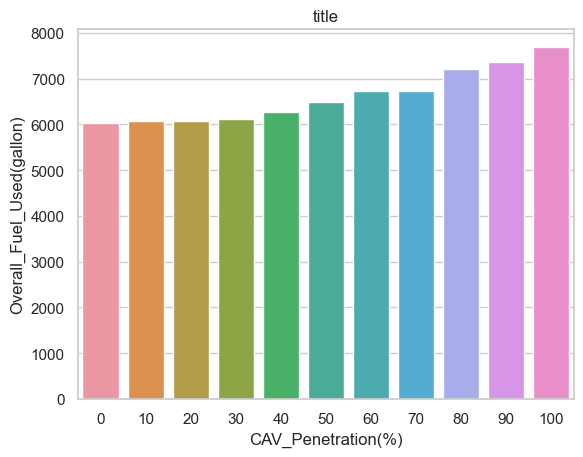

In [5]:
# sns.set_theme(style='whitegrid', palette='Paired')
sns.set_theme(style='whitegrid', palette='bright')
# sns.set_style("whitegrid")
# g = sns.lmplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Used(gallon)', data = test_df, order=5, ci=None)
# g = sns.lmplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Used(gallon)', data = test_df)
# g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Used(gallon)', data = test_df, hue='Eco_Routing_with_Travel_Time(0/1)', markers=['O'], markersize = 5)
g = sns.barplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Used(gallon)', data = test_df)
# g = (g.set_axis_labels('Tips', 'Total bill(USD)').set(xlim=(0,10), ylim=(0,100)))
plt.title('title')
plt.show(g)
# g.savefig('test.pdf')

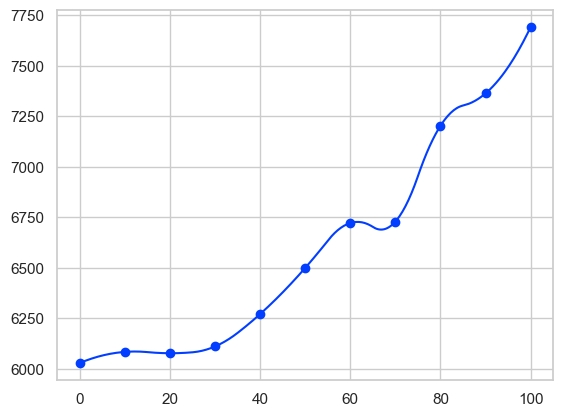

In [6]:
fig, ax = plt.subplots()
x = test_df['CAV_Penetration(%)']
y = test_df['Overall_Fuel_Used(gallon)']
xnew = np.linspace(x.min(), x.max(), 300)
gfg = make_interp_spline(x, y, k=2)
y_new = gfg(xnew)
plt.plot(xnew, y_new)
plt.scatter(x,y)
plt.show()
# ax.plot(test_df['CAV_Penetration(%)'], test_df['Overall_Fuel_Used(gallon)'], marker = "o", markersize = 5)

In [7]:

test_df.columns

Index(['Time', 'Demand_Percentage(%)', 'Prediction_Horizon(min)',
       'CAV_Penetration(%)', 'Eco_Routing_with_Travel_Time(0/1)',
       'Vehicle_Fleet', 'Overall_Travel_Time_Avg(s)',
       'Overall_Fuel_Used(gallon)', 'Overall_Electricity_Used(kWh)',
       'Overall_Fuel_Cost($)', 'Overall_Electricity_Cost($)',
       'Total_Number_of_Vehicles', 'Travel_Time_ICE_Avg(s)',
       'Travel_Time_ICE_NONCAV_Avg(s)', 'Travel_Time_BEV_Avg(s)',
       'Travel_Time_BEV_NONCAV_Avg(s)', 'Travel_Time_PHEV_Avg(s)',
       'Travel_Time_PHEV_NONCAV_Avg(s)', 'Travel_Time_HFCV_Avg(s)',
       'Travel_Time_HFCV_NONCAV_Avg(s)', 'Fuel_Used_ICE_Avg(gallon)',
       'Fuel_Used_ICE_NONCAV_Avg(gallon)', 'Fuel_Used_BEV_Avg(gallon)',
       'Fuel_Used_BEV_NONCAV_Avg(gallon)', 'Fuel_Used_PHEV_Avg(gallon)',
       'Fuel_Used_PHEV_NONCAV_Avg(gallon)', 'Fuel_Used_HFCV_Avg(gallon)',
       'Fuel_Used_HFCV_NONCAV_Avg(gallon)', 'Electricity_Used_ICE_Avg(kWh)',
       'Electricity_Used_ICE_NONCAV_Avg(kWh)', 'Electri

In [15]:
statistics_df = df.copy(deep=True)
statistics_df['Overall_Fuel_Saving'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['Overall_Electricity_Saving'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['ICE_Saving'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['BEV_Saving'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['PHEV_Saving'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
statistics_df['HFCV_Saving'] = statistics_df['Fuel_Used_ICE_Avg(gallon)'].copy()
for idx in statistics_df.index:
    base_df = statistics_df[(statistics_df['Vehicle_Fleet'] == statistics_df['Vehicle_Fleet'][idx]) 
             & (statistics_df['Demand_Percentage(%)'] == statistics_df['Demand_Percentage(%)'][idx]) 
             & (statistics_df['Eco_Routing_with_Travel_Time(0/1)'] == statistics_df['Eco_Routing_with_Travel_Time(0/1)'][idx]) 
             & (statistics_df['Prediction_Horizon(min)'] == statistics_df['Prediction_Horizon(min)'][idx]) 
             & (statistics_df['CAV_Penetration(%)'] == 0)]
    base_overall_fuel = base_df['Overall_Fuel_Used(gallon)'].values[0]
    base_overall_electricity = base_df['Overall_Electricity_Used(kWh)'].values[0]
    base_ice = base_df['Fuel_Used_ICE_NONCAV_Avg(gallon)'].values[0]
    base_bev = base_df['Electricity_Used_BEV_NONCAV_Avg(kWh)'].values[0]
    base_phev = base_df['Electricity_Used_PHEV_NONCAV_Avg(kWh)'].values[0]
    base_hfcv = base_df['Electricity_Used_HFCV_NONCAV_Avg(kWh)'].values[0]
    
    statistics_df['Overall_Fuel_Saving'][idx] = (statistics_df['Overall_Fuel_Used(gallon)'][idx] - base_overall_fuel) / base_overall_fuel * 100.0
    statistics_df['Overall_Electricity_Saving'][idx] = (statistics_df['Overall_Electricity_Used(kWh)'][idx] - base_overall_electricity) / base_overall_electricity * 100.0
    if statistics_df['Fuel_Used_ICE_Avg(gallon)'][idx] > 0:
        statistics_df['ICE_Saving'][idx] = (statistics_df['Fuel_Used_ICE_Avg(gallon)'][idx] - base_ice) / base_ice * 100.0
    else:
        statistics_df['ICE_Saving'][idx] = 0.0
        
    if statistics_df['Electricity_Used_BEV_Avg(kWh)'][idx] > 0:
        statistics_df['BEV_Saving'][idx] = (statistics_df['Electricity_Used_BEV_Avg(kWh)'][idx] - base_bev) / base_bev * 100.0
    else:
        statistics_df['BEV_Saving'][idx] = 0.0
        
    if statistics_df['Electricity_Used_PHEV_Avg(kWh)'][idx] > 0:
        statistics_df['PHEV_Saving'][idx] = (statistics_df['Electricity_Used_PHEV_Avg(kWh)'][idx] - base_phev) / base_phev * 100.0
    else:
        statistics_df['PHEV_Saving'][idx] = 0.0
        
    if statistics_df['Electricity_Used_HFCV_Avg(kWh)'][idx] > 0:
        statistics_df['HFCV_Saving'][idx] = (statistics_df['Electricity_Used_HFCV_Avg(kWh)'][idx] - base_hfcv) / base_hfcv * 100.0
    else:
        statistics_df['HFCV_Saving'][idx] = 0.0

C:\Users\lidon\AppData\Local\Temp\ipykernel_32196\1980779276.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df['Overall_Fuel_Saving'][idx] = (statistics_df['Overall_Fuel_Used(gallon)'][idx] - base_overall_fuel) / base_overall_fuel * 100.0
C:\Users\lidon\AppData\Local\Temp\ipykernel_32196\1980779276.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_df['Overall_Electricity_Saving'][idx] = (statistics_df['Overall_Electricity_Used(kWh)'][idx] - base_overall_electricity) / base_overall_electricity * 100.0
C:\Users\lidon\AppData\Local\Temp\ipykernel_32196\1980779276.py:26: SettingWithCopyWarnin

In [36]:
vehicle_fleet = '2030'
demand_percentage = 100
eco_routing_with_travel_time = 0
prediction_horizon = 5

target_df = statistics_df[(statistics_df['Vehicle_Fleet'] == vehicle_fleet) 
             & (statistics_df['Demand_Percentage(%)'] == demand_percentage) 
             & (statistics_df['Eco_Routing_with_Travel_Time(0/1)'] == eco_routing_with_travel_time) 
             & (statistics_df['Prediction_Horizon(min)'] == prediction_horizon)]

# # target_df.reset_index(drop=True, inplace=True)
target_df


,Time,Demand_Percentage(%),Prediction_Horizon(min),CAV_Penetration(%),Eco_Routing_with_Travel_Time(0/1),Vehicle_Fleet,Overall_Travel_Time_Avg(s),Overall_Fuel_Used(gallon),Overall_Electricity_Used(kWh),Overall_Fuel_Cost($),...,Vehicle_Count_PHEV_NONCAV_After1hour,Vehicle_Count_HFCV_After1hour,Vehicle_Count_HFCV_NONCAV_After1hour,number_of_vehicles_left_in_the_network,Overall_Fuel_Saving,Overall_Electricity_Saving,ICE_Saving,BEV_Saving,PHEV_Saving,HFCV_Saving
0,2.020000e+13,100,5,0,0,2030,799.776,6028.51,12454.2,21099.8,...,944,0,87,164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.020000e+13,100,5,10,0,2030,809.115,6083.52,12668.6,21292.3,...,986,9,69,217,0.912497,1.721508,0.980196,-6.299550,-13.171665,-25.841641
2,2.020000e+13,100,5,20,0,2030,795.360,6076.90,12654.8,21269.1,...,839,23,76,105,0.802686,1.610702,1.601986,-3.401381,-9.046129,-12.507681
3,2.020000e+13,100,5,30,0,2030,781.032,6110.38,12632.1,21386.3,...,673,29,65,103,1.358047,1.428434,0.928995,-3.547305,-5.848920,-19.284181
4,2.020000e+13,100,5,40,0,2030,810.031,6270.69,12560.4,21947.4,...,601,47,48,70,4.017245,0.852724,5.800038,-5.891866,-6.149434,-9.592933
5,2.020000e+13,100,5,50,0,2030,861.479,6499.14,12839.9,22747.0,...,532,48,41,38,7.806738,3.096947,9.132012,-3.880523,-6.727597,-8.088570
6,2.020000e+13,100,5,60,0,2030,881.195,6721.54,12875.9,23525.4,...,445,58,38,87,11.495875,3.386006,12.465721,-5.382637,-5.531420,-10.836327
7,2.020000e+13,100,5,70,0,2030,905.188,6728.69,12383.9,23550.4,...,303,63,24,269,11.614479,-0.564468,11.502881,-3.514209,-3.951761,-10.208124
8,2.020000e+13,100,5,80,0,2030,1031.940,7202.81,11939.1,25209.8,...,225,82,19,836,19.479108,-4.135954,20.863562,-6.702721,-8.131521,-16.161959
9,2.020000e+13,100,5,90,0,2030,1033.990,7363.25,12481.8,25771.4,...,119,89,8,217,22.140463,0.221612,20.936025,-3.596949,-3.649940,-13.042630


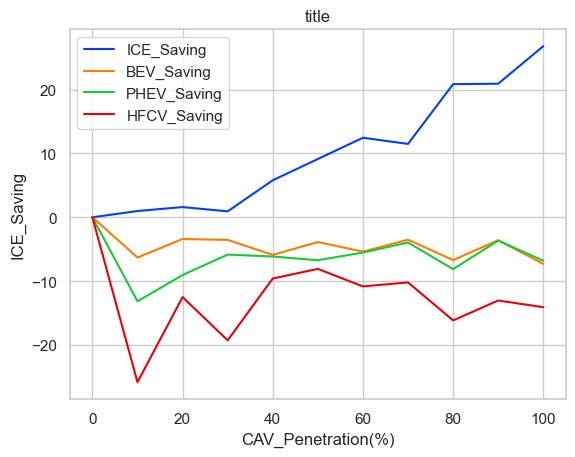

In [34]:
# sns.set_theme(style='whitegrid', palette='Paired')
sns.set_theme(style='whitegrid', palette='bright')
# sns.set_style("whitegrid")

# g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Saving', data = target_df, legend='full')
# g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'Overall_Electricity_Saving', data = target_df)
g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'ICE_Saving', data = target_df, label = 'ICE_Saving')
g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'BEV_Saving', data = target_df, label = 'BEV_Saving')
g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'PHEV_Saving', data = target_df, label = 'PHEV_Saving')
g = sns.lineplot(x = 'CAV_Penetration(%)', y = 'HFCV_Saving', data = target_df, label = 'HFCV_Saving')
# g = sns.barplot(x = 'CAV_Penetration(%)', y = 'Overall_Fuel_Used(gallon)', data = test_df)
plt.legend()
plt.title('title')
plt.show(g)
# g.savefig('test.pdf')